In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
from thunder_ase.fireball import Fireball
import numpy as np
import ase
from ase.build import molecule

## Basic Setup

In [ ]:
# Construct Benzene Structure
atoms = molecule('C6H6')

In [ ]:
# set Fdata dir
Fdata_path = '../../data/Fdata-McWEDA-0.15-3SN.Hs3.75.Cs4.00p4.45.Os3.35p3.80-3SNP.Fes5.30p5.30d4.80'

## Example 1: Write orbital to mwfn

### Set up parameters for fireball

In [ ]:
kwargs = {'iwriteout_charges': 1,  # Writing out the charges.
          'iwriteout_cdcoeffs': 1,  # Writing out orbital info.
          'efermi_T': 200.0,
          'max_scf_iterations_set': 100,
          'scf_tolerance_set': 0.00000001,
          }

### Run Fireball

In [ ]:
calc = Fireball(command='fireball.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)
atoms.set_calculator(calc)

In [ ]:
# Not neccessory but recommended
e0 = atoms.get_potential_energy()
efermi = atoms.calc.get_fermi_level()

print("The energy is {:.3f} eV.".format(e0))
print("The Fermi Level is {:.3f} eV.".format(efermi))

### Write mwfn file

In [ ]:
calc.write_mwfn()

### Now, run Multiwfn in terminal and load .mwfn file

See more about multiwfn: http://sobereva.com/multiwfn/

## Example 2: Electrostatic potential (ESP)

**Step 1** : Write the following content to file `ESP_input.in` 

```
5
12
2
2
0
5
1
2
2
0
q
```
More info about above file in Multiwfn Manual *5.2 Running Multiwfn in silent mode*

**Step 2**: Run this command in terminal: 
`Multiwfn benzene.mwfn < ESP_input.in > medinfo.txt`

This will generate two files: density.cub and totesp.cub

**Tip:** ESP calculation is time consuming, there's a trick to reduce the time (see more: http://sobereva.com/602): set `ESPrhoiso` in your Multiwfn `setting.ini` to 0.001.

**Step 3**: Load density.cub and totesp.cub into VMD. Finally it will get:

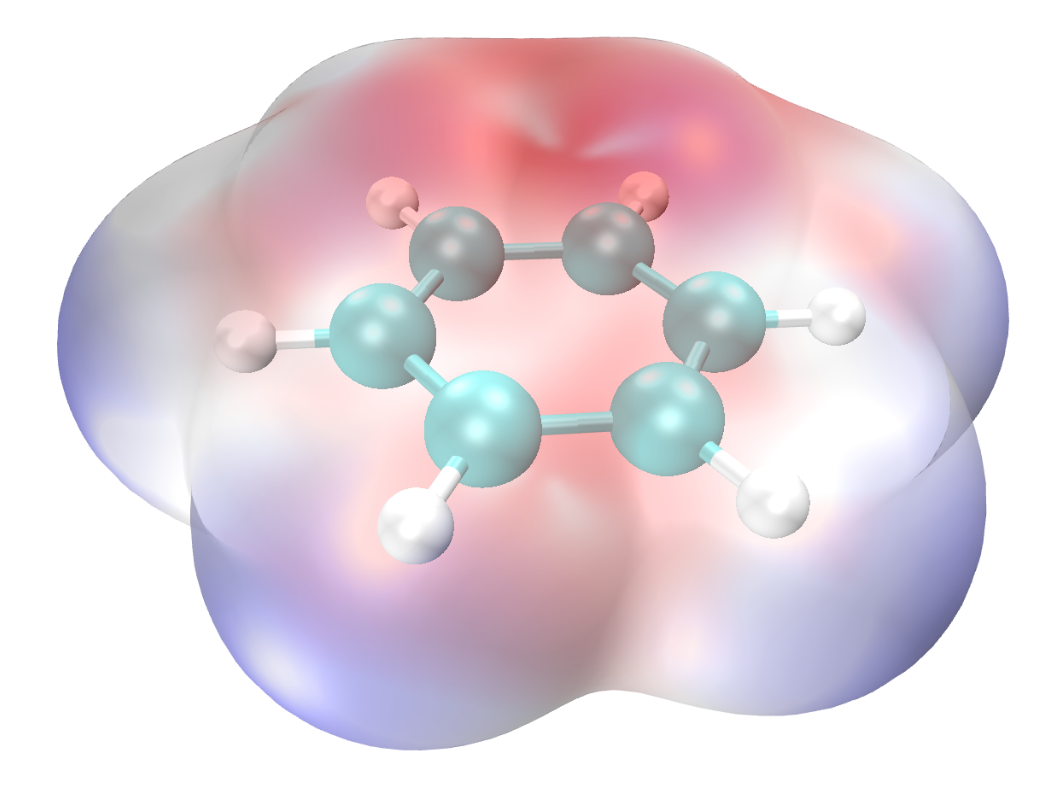


## Example 3: Fukui function


### Step 1: Calculate neutral systems: N electron

In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
kwargs = {'iwriteout_charges': 1,  # Writing out the charges.
          'iwriteout_cdcoeffs': 1,  # Writing out orbital info.
          'qstate': 0,  # Set charge to 0. This is also the default.
          'efermi_T': 200.0,
          'max_scf_iterations_set': 100,
          'scf_tolerance_set': 0.00000001,
          }

calc = Fireball(command='fireball.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)

#atoms.set_calculator(calc)

calc.calculate(atoms=atoms)

calc.write_mwfn(filename='N.mwfn')

### Step 2: Calculate charged systems: N + 1

In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
kwargs = {'iwriteout_charges': 1,  # Writing out the charges.
          'iwriteout_cdcoeffs': 1,  # Writing out orbital info.
          'qstate': 1,  # adding one electron.
          'efermi_T': 200.0,
          'max_scf_iterations_set': 100,
          'scf_tolerance_set': 0.00000001,
          }

calc = Fireball(command='fireball.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)

#atoms.set_calculator(calc)

calc.calculate(atoms=atoms)

calc.write_mwfn(filename='N+1.mwfn')

### Step 3: Calculate charged systems: N - 1

In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
kwargs = {'iwriteout_charges': 1,  # Writing out the charges.
          'iwriteout_cdcoeffs': 1,  # Writing out orbital info.
          'qstate': -1, # deleting one electron.
          'efermi_T': 200.0,
          'max_scf_iterations_set': 100,
          'scf_tolerance_set': 0.00000001,
          }

calc = Fireball(command='fireball.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)

#atoms.set_calculator(calc)

calc.calculate(atoms=atoms)

calc.write_mwfn(filename='N-1.mwfn')

### Now, run Multiwfn in terminal and load .mwfn files

Multiwfn operation: Main -> 22 -> 3 -> Input name for each mwfn file -> 2 -> 4/1/2/3

Then you will get:

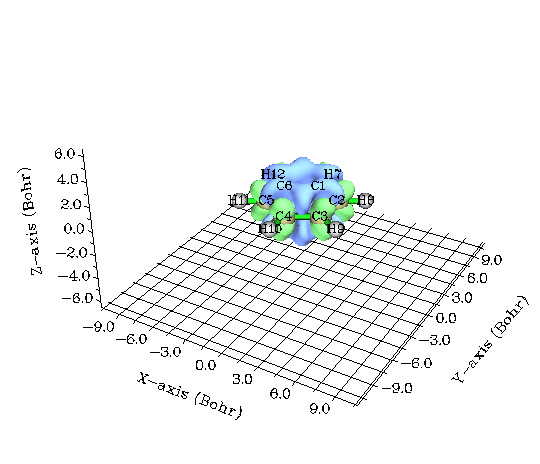

See more about multiwfn for Fukui function calculation in the manual Part 3.25.3